In [ ]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

num_rows = 500
users = np.arange(1, 51) # User_ID from 1 to 50
movie_titles = ['The Dark Knight', 'Inception', 'Toy Story', 'The Lion King', 'Titanic', 'The Notebook']

# Generate random User_ID and Movie_Title for 500 rows
user_ids = np.random.choice(users, size=num_rows)
movie_selection = np.random.choice(movie_titles, size=num_rows)

df = pd.DataFrame({'User_ID': user_ids, 'Movie_Title': movie_selection})
df['Rating'] = np.random.randint(1, 6, size=num_rows) # Initial random ratings from 1 to 5

# Apply crucial logic:
# Users who like 'The Dark Knight' should also give high ratings to 'Inception'.
# (Assume 'high rating' means 4 or 5)

# Find User_IDs that rated 'The Dark Knight' highly (4 or 5)
dark_knight_high_raters = df[(df['Movie_Title'] == 'The Dark Knight') & (df['Rating'] >= 4)]['User_ID'].unique()

# For these users, ensure their 'Inception' ratings are high (4 or 5)
for user_id in dark_knight_high_raters:
    inception_mask = (df['User_ID'] == user_id) & (df['Movie_Title'] == 'Inception')
    if inception_mask.any():
        df.loc[inception_mask, 'Rating'] = np.random.randint(4, 6, size=inception_mask.sum())

# Users who like 'Toy Story' should also give high ratings to 'The Lion King'.
# Find User_IDs that rated 'Toy Story' highly (4 or 5)
toy_story_high_raters = df[(df['Movie_Title'] == 'Toy Story') & (df['Rating'] >= 4)]['User_ID'].unique()

# For these users, ensure their 'The Lion King' ratings are high (4 or 5)
for user_id in toy_story_high_raters:
    lion_king_mask = (df['User_ID'] == user_id) & (df['Movie_Title'] == 'The Lion King')
    if lion_king_mask.any():
        df.loc[lion_king_mask, 'Rating'] = np.random.randint(4, 6, size=lion_king_mask.sum())

display(df.head())

,User_ID,Movie_Title,Rating
0,39,Titanic,1
1,29,The Lion King,5
2,15,The Dark Knight,5
3,43,The Notebook,4
4,8,The Notebook,3


Pivot Table Head:


Movie_Title,Inception,The Dark Knight,The Lion King,The Notebook,Titanic,Toy Story
User_ID,,,,,,
1,4.000000,3.250000,4.0,5.0,3.00,5.000000
2,4.666667,2.333333,4.0,1.0,0.00,3.000000
3,0.000000,1.500000,4.5,3.0,2.25,2.666667
4,3.000000,3.000000,0.0,3.0,3.75,0.000000
5,3.500000,3.000000,5.0,2.5,0.00,4.000000


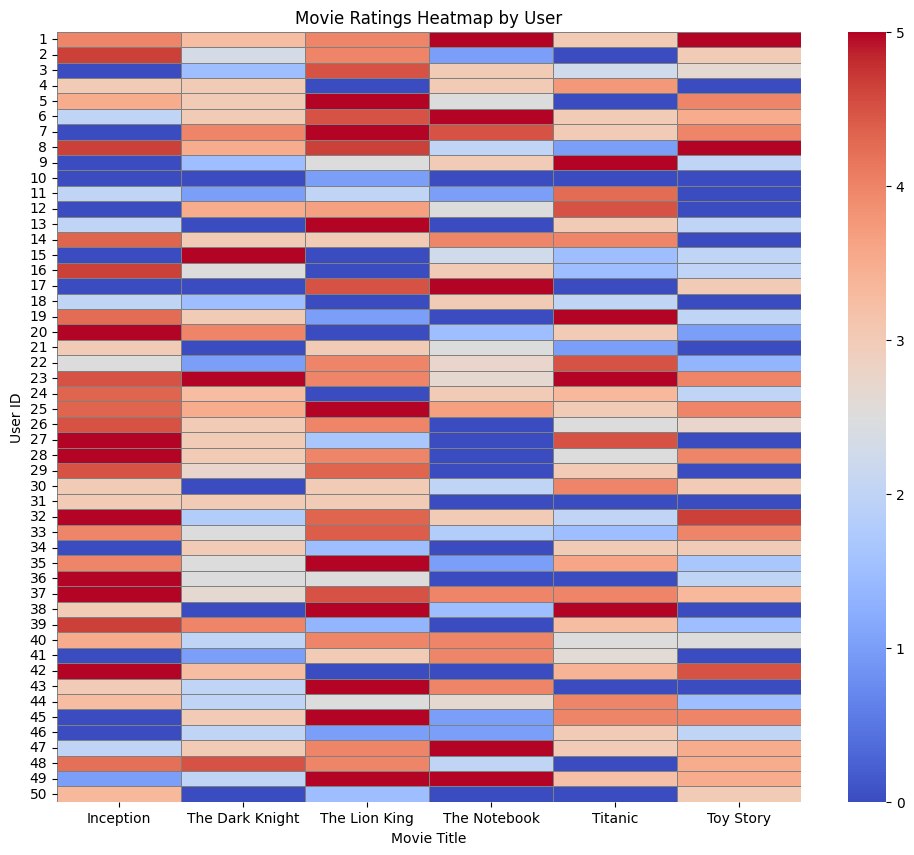

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table
ratings_pivot = df.pivot_table(index='User_ID', columns='Movie_Title', values='Rating').fillna(0)

# Display the first few rows of the pivot table to confirm
print("Pivot Table Head:")
display(ratings_pivot.head())

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(ratings_pivot, cmap='coolwarm', annot=False, fmt=".0f", linewidths=.5, linecolor='gray')
plt.title('Movie Ratings Heatmap by User')
plt.xlabel('Movie Title')
plt.ylabel('User ID')
plt.show()

In [ ]:
# Compute the Correlation Matrix
movie_correlation_matrix = ratings_pivot.corr(method='pearson')

# Display the correlation matrix head to confirm
print("Movie Correlation Matrix Head:")
display(movie_correlation_matrix.head())

# Define the recommendation function
def get_recommendations(movie_name, num_recommendations=3):
    if movie_name not in movie_correlation_matrix.columns:
        return f"Movie '{movie_name}' not found in the dataset."

    # Get correlations for the selected movie
    correlations = movie_correlation_matrix[movie_name].sort_values(ascending=False)

    # Filter out the movie itself and then get the top N recommendations
    # We convert to string to avoid potential issues with indexing if movie_name is not exact
    recommendations = correlations[correlations.index != movie_name].head(num_recommendations)

    return recommendations

# Test the recommendation engine
print(f"\nTop 3 recommendations for 'The Dark Knight':")
display(get_recommendations('The Dark Knight', num_recommendations=3))

Movie Correlation Matrix Head:


Movie_Title,Inception,The Dark Knight,The Lion King,The Notebook,Titanic,Toy Story
Movie_Title,,,,,,
Inception,1.000000,0.287838,-0.027791,-0.233465,-0.032685,0.158503
The Dark Knight,0.287838,1.000000,-0.092635,0.026149,0.117754,0.306104
The Lion King,-0.027791,-0.092635,1.000000,0.307782,-0.047724,0.358665
The Notebook,-0.233465,0.026149,0.307782,1.000000,0.059030,0.191601
Titanic,-0.032685,0.117754,-0.047724,0.059030,1.000000,-0.101643



Top 3 recommendations for 'The Dark Knight':


,The Dark Knight
Movie_Title,
Toy Story,0.306104
Inception,0.287838
Titanic,0.117754
